### 데이터 불러오기

In [40]:
import torch
import torchvision
import torchvision.transforms as transforms

In [41]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### 데이터 일부 확인

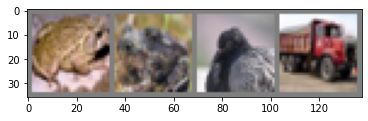

frog  frog  bird  truck


In [42]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!

In [43]:
import torch.nn as nn

In [44]:
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3),            
            nn.ReLU(),                                                        
            nn.Conv2d(in_channels=16,out_channels=48,kernel_size=3),          
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),                             
            nn.Conv2d(in_channels=48, out_channels=72, kernel_size=3),         
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)                                
        )
        self.fc_layer = nn.Sequential(                                          
            nn.Linear(72*6*6,100),                                             
            nn.ReLU(),
            nn.Linear(100,10)                                                   
        )       


    def forward(self, x):
      out = self.layer(x)                                                    
      out = out.view(out.size(0),-1)                                          
      out = self.fc_layer(out)
      return out

net = Net()

## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [45]:
import torch.optim as optim
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')  
model=Net().to(device)
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), momentum = 0.9, lr=0.001)

## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [46]:
!pip install torchsummary

In [47]:
from torchsummary import summary
summary(model, (3,32,32), batch_size=256)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [256, 16, 30, 30]             448
              ReLU-2          [256, 16, 30, 30]               0
            Conv2d-3          [256, 48, 28, 28]           6,960
              ReLU-4          [256, 48, 28, 28]               0
         MaxPool2d-5          [256, 48, 14, 14]               0
            Conv2d-6          [256, 72, 12, 12]          31,176
              ReLU-7          [256, 72, 12, 12]               0
         MaxPool2d-8            [256, 72, 6, 6]               0
            Linear-9                 [256, 100]         259,300
             ReLU-10                 [256, 100]               0
           Linear-11                  [256, 10]           1,010
Total params: 298,894
Trainable params: 298,894
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 3.00
Forward/

## Train

In [48]:
# 모델을 학습

for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        x=inputs.to(device)            
        y_=labels.to(device)           
        optimizer.zero_grad() 
        output=model.forward(x)      
        loss=loss_func(output,y_)     
        loss.backward()               
        optimizer.step()              
    
        if i%1000==0:
          print(loss)

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

tensor(2.3065, grad_fn=<NllLossBackward0>)
tensor(2.1722, grad_fn=<NllLossBackward0>)
[1,  2000] loss: 2.108
tensor(1.5352, grad_fn=<NllLossBackward0>)
tensor(2.4145, grad_fn=<NllLossBackward0>)
[1,  4000] loss: 1.715
tensor(1.2181, grad_fn=<NllLossBackward0>)
tensor(1.0742, grad_fn=<NllLossBackward0>)
[1,  6000] loss: 1.504
tensor(1.4238, grad_fn=<NllLossBackward0>)
tensor(0.5179, grad_fn=<NllLossBackward0>)
[1,  8000] loss: 1.427
tensor(0.6366, grad_fn=<NllLossBackward0>)
tensor(1.4781, grad_fn=<NllLossBackward0>)
[1, 10000] loss: 1.340
tensor(1.2448, grad_fn=<NllLossBackward0>)
tensor(1.2915, grad_fn=<NllLossBackward0>)
[1, 12000] loss: 1.252
tensor(1.9406, grad_fn=<NllLossBackward0>)
tensor(0.5757, grad_fn=<NllLossBackward0>)
tensor(0.8221, grad_fn=<NllLossBackward0>)
[2,  2000] loss: 1.117
tensor(1.1327, grad_fn=<NllLossBackward0>)
tensor(0.9388, grad_fn=<NllLossBackward0>)
[2,  4000] loss: 1.084
tensor(1.4723, grad_fn=<NllLossBackward0>)
tensor(0.4866, grad_fn=<NllLossBackward0>)

## Test

In [49]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [50]:
## 아래 코드 그대로 실행

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 9 %


## 클래스별 accuracy 비교

In [51]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 0.0 %
Accuracy for class: car   is 0.0 %
Accuracy for class: bird  is 84.1 %
Accuracy for class: cat   is 0.0 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 0.0 %
Accuracy for class: frog  is 11.9 %
Accuracy for class: horse is 0.0 %
Accuracy for class: ship  is 0.0 %
Accuracy for class: truck is 0.0 %
